In [ ]:
#importing libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml #for the dataset of handwritten digits images which has alomst 70,000 digits with labels marked from 0 to 9
from sklearn.metrics import classification_report, confusion_matrix #to track the performance of the model


In [ ]:
# Read and transform data
mnist = fetch_openml('mnist_784') #reading the data using scikit learn function fetch ml data MINST_784 is the name of the dataset
inputData, y = mnist["data"], mnist["target"]# within MINST_784 there are two entities (target= tag or label identified from 0-9 what handwritten number it actually is) (data= image which is hnadwritten number)
#therefore from the above line of code input data is the  image data or "data" and y is the labels or "target"

In [ ]:
# 1) image data is in the form of pixels (image size=28x28=784) and each pixel out of 784 is range from integer 0 to 255
inputData = inputData / 255 # 2) but here we want to use the range 0-1 and not 0-255 therefore we divide each pixel by 255 ie. in short each pixel sizes from 0-255 but we want it to range between 0-1
nDigits = 10 #total number of classes that is n digits ranging from 0-9 =10 ie. 10=n ranging from 0-9

yOneHot = np.zeros([y.shape[0],nDigits]) # creates matrix of zeroes having 70k rows as the sample inputs or targets are 70k and the number of columns as n=10 from 0 to 9 and depending upon the digit to be recognised given between 0-9 it will msake the paricular coloumn as 1 and rest as 0 so if for eg. 8 is the input then leaving 9 column every other column will be 0 and 9 will be one (0-9 range)
#using one hot encoding  here named as yOneHot
for i in range(y.shape[0]): #goes through all the values of y in the matrix and with the help of one hot encoding
    yOneHot[i,int(y[i])]=1 # here we are setting the corresponding column whose digit we have to recognize to 1
    # accoring to the i th row the y[i] which is the column is set to 1

y = yOneHot # here we replace the value of y with yOnehot with the matrices and where the columns are set to 1 for the regognised value

m = 60000 # takin 60k for the training of data and rest 10k for testing
m_test = inputData.shape[0] - m

y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits) #training and testing
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]

np.random.seed(1002) # generates random inputs The seed for these algorithms tells them where to start in the sequence. Change the start point and you get a different sequence. Keep the start point the same, and you get the same sequence again and again. this is used to tweak the neural network

In [ ]:
y[0:2,:]
#y [first two rows , all the columns]
# here in the output the first row has  6th column as one therefore 5 number is the image recognized by the system and has that label too
# and the second row has 1st column as 1 therefore 0 is thr image number regonised by the system and has that label too



array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y[7000,:]



#now here the column number which is one is the 9th column and hence the regognized number is 8th
#[0,1,2,3,4,5,6,7,8,9] accordingly

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

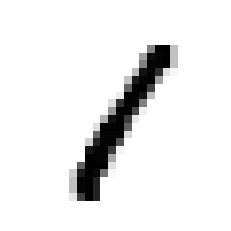

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Show a random input

i = 7000 #setting number to 7000
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary) #28x28 pixel size and binary representation using matplotlib
plt.axis("off")
plt.show()
print(y_train[i,:])

In [ ]:
# Define activation, loss, and their derivatives
#activation functions and formulas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

    #applying all of this in the neural network

In [ ]:
inputDim = InputData_train.shape[1] # keeping the same dimensions
nHidden = 64 #64 nodes inside the neural network and  is hidden
learning_rate = 1 # ita that is set to one the learning rate of the model
weight_decay = 0.001 #regularizer on L2 nom of the weight

W1 = 0.01*np.random.randn(nHidden, inputDim) #weights from input to the hidden layers Ie. (64 nodes,hidden dimension ie the columns ) and initialising using randn variable, multiplying with a very small number here given as 0.01 so that we dont have large weights which the network has difficulty in adjusting
b1 = np.zeros((nHidden, 1))#biasis are usually set to 0
W2 = 0.01*np.random.randn(nDigits, nHidden)# second sets of weights from the input layer to the output layer (outputs, hidden layers) fotmar in the circular bracket
b2 = np.zeros((nDigits, 1)) # biasis are equal the the output nodes (output,)

inputData = InputData_train
y = y_train # setting data for neural network

Epoch 0 cost:  2.3025926683067466
Epoch 10 cost:  1.3575995606291273
Epoch 20 cost:  1.5435466738823724
Epoch 30 cost:  1.0957404033897622
Epoch 40 cost:  0.9177537929310634
Epoch 50 cost:  0.5149939683116712
Epoch 60 cost:  0.6243709546604148
Epoch 70 cost:  0.4456593950527855
Epoch 80 cost:  0.34769817492745114
Epoch 90 cost:  0.3251370927925338


<function matplotlib.pyplot.show>

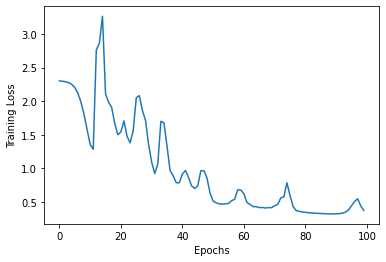

In [ ]:
nEpochs = 100 #number of epochs introduced we will train the neural network for
costPlot = np.zeros(nEpochs) # this will store the loss usually called as cost for each epoch

for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1 # multiplying input data with first set of wieghts(wieghts that connect input data to the hidden layer)and adding biases to make it more accurate
    A1 = relu(Z1) #activation function used is ReLu aplied on the W1 set (now after this line is executed the output of the hidden layer is set in A1 activation function)
    Z2 = np.matmul(W2,A1) + b2 #now multiplying A1 to the second hidden layer and adding bias
    A2 = softmax(Z2) # a2 is the output of neural network A2 will have an output each of 10 dimensions and then they will add upto 1 because the totall probablity is 1

    cost = CrossEntropyLoss(y.T, A2) # loss is calculated and ploted uskig the below line of code here in the  cirlciular brackets (targatted value, the o/p of the neural network is given)
    costPlot[i] = cost # here cost is stored for each iteration so that we can see how the cost i decreasing with each iteration
    # there is a diagram and a very well explaination given in the greatlearning course for the code given below
    dZ2 = CE_Softmax_Derivative(A2,y.T) # derivative of loss with respect to z2 is
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
  #here dividing by m ie. (1/m)so we can compute the entire derivative of the batch together (above code)
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
# here everything is implimented according to the formulas and is similary put inside the functions(below code)
    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1

    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost) #every 10th epoch the the output is printed the use of the for loop

plt.plot(costPlot) #ploting the cost for all the epochs
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [ ]:
# you see that the loss function is decresing as seen in the graph has decreased and the loss has decreased accordingly and if we train the model even more after this the accuracy will decrease the accuracy and we dont want that so we stop training after 100 epochs.
# if we decrease the learning rate not much of a diffrence is gonna take place it indicates that 0.3 is the best loss or cost the model can achieve

In [ ]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2 #forward pass takes place

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels)) #pre built functions used
print(classification_report(predictions, labels))


[[ 957    0    8    3    2   10   12    4    4   14]
 [   0 1097    4    0    1    2    2    9    4    3]
 [   1    1  926   26    6    7    4   30    9    5]
 [   1    4   14  919    1   67    1    4   14   13]
 [   0    0   13    0  893    7   13    7    6   27]
 [   0    0    0   18    0  677   14    0    6    2]
 [   8    4   14    1   14   15  901    0    9    1]
 [   3    2   13   10    1    8    0  936    9   15]
 [   9   27   38   28   13   93   11    5  908   24]
 [   1    0    2    5   51    6    0   33    5  905]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1014
           1       0.97      0.98      0.97      1122
           2       0.90      0.91      0.90      1015
           3       0.91      0.89      0.90      1038
           4       0.91      0.92      0.92       966
           5       0.76      0.94      0.84       717
           6       0.94      0.93      0.94       967
           7       0.91      0.94   

In [ ]:
#precision    recall  f1-score   support

           0       0.98      0.94      0.96      1014]
#change in the hidden nodes and change the epochs and also the learning rate is changed can cause major changes to the model.
# but here we dont change two things like nodes or learning rate at the same time because then we wouldnt know which one lead to a good impact and which one lead to a bad one